In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [39]:
plt.style.use("ggplot")

In [40]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv")

In [41]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [42]:
df.due_date = pd.to_datetime(df.due_date)
df.effective_date = pd.to_datetime(df.effective_date)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [44]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

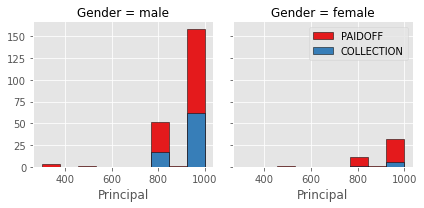

In [45]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, "Principal", bins = bins, ec = "k")

g.axes[-1].legend()
plt.show()

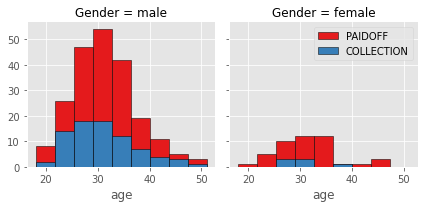

In [46]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

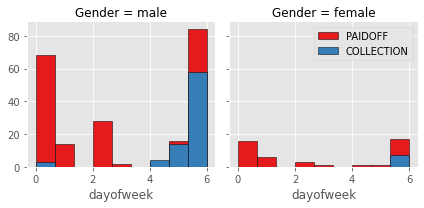

In [47]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [48]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [49]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [50]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [51]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [52]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [53]:
df["loan_status"].replace(to_replace = ["PAIDOFF", "COLLECTION"],
                         value = [0, 1], inplace = True)
df.loan_status = df.loan_status.astype("int")

In [75]:
df.loan_status

0      0
1      0
2      0
3      0
4      0
      ..
341    1
342    1
343    1
344    1
345    1
Name: loan_status, Length: 346, dtype: int64

In [80]:
X = Feature
y = df.loan_status.values

In [81]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### KNN
Best k seems to be 6

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))


for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

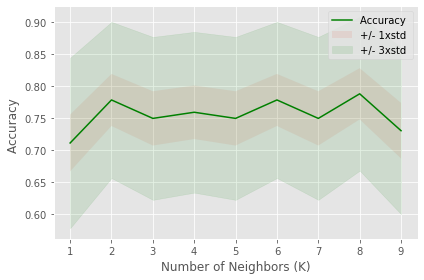

In [100]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),
                 mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, 
                 alpha=0.10)
plt.fill_between(range(1,Ks),
                 mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, 
                 alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [101]:
clf = KNeighborsClassifier(n_neighbors = 2).fit(x_train, y_train)
yhat = clf.predict(x_test)

In [102]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label = 0)

0.7745098039215687

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[79  8]
 [15  2]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        87
           1       0.20      0.12      0.15        17

    accuracy                           0.78       104
   macro avg       0.52      0.51      0.51       104
weighted avg       0.74      0.78      0.75       104



### Decision Tree
max_depth = 2

In [131]:
from sklearn.tree import DecisionTreeClassifier

max_depths = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, max_depths):
    clf = DecisionTreeClassifier(criterion = "entropy",
                                 max_depth = n)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

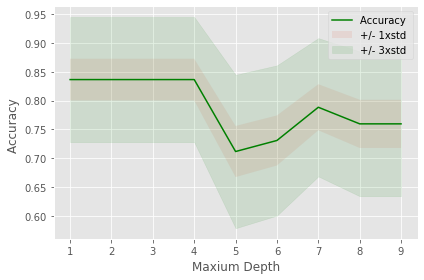

In [132]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),
                 mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, 
                 alpha=0.10)
plt.fill_between(range(1,Ks),
                 mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, 
                 alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Maxium Depth')
plt.tight_layout()
plt.show()

In [133]:
clf = DecisionTreeClassifier(criterion = "entropy",
                                 max_depth = 3)
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

In [134]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label = 0)

0.8365384615384616

In [135]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[87  0]
 [17  0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        87
           1       0.00      0.00      0.00        17

    accuracy                           0.84       104
   macro avg       0.42      0.50      0.46       104
weighted avg       0.70      0.84      0.76       104



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


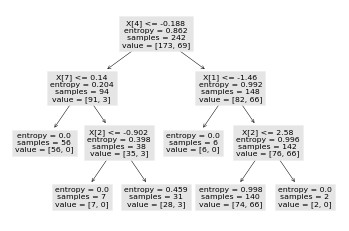

In [136]:
import sklearn.tree as tree
tree.plot_tree(clf)
plt.show()

### Random Forests

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [138]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7115384615384616

In [142]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_jobs=1)

In [146]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,
                        index=Feature.columns).sort_values(ascending=False)
feature_imp

age                     0.535029
weekend                 0.248044
terms                   0.074397
Gender                  0.039603
Principal               0.039414
High School or Below    0.023106
college                 0.022201
Bechalor                0.018205
dtype: float64

In [147]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred, pos_label = 0)

0.6938775510204082

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68 19]
 [11  6]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        87
           1       0.24      0.35      0.29        17

    accuracy                           0.71       104
   macro avg       0.55      0.57      0.55       104
weighted avg       0.76      0.71      0.73       104



### SVM
polynomial kernel

In [109]:
from sklearn import svm
kerns = ['linear', 'poly', 'rbf', 'sigmoid']
mean_acc = np.zeros((len(kerns)))
std_acc = np.zeros((len(kerns)))

for count, k in enumerate(kerns, 1):
    clf = svm.SVC(kernel = k)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    mean_acc[count-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[count-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
print(mean_acc, std_acc)

[0.83653846 0.82692308 0.75961538 0.79807692] [0.03626052 0.03709672 0.04190188 0.03936395]


In [120]:
clf = svm.SVC(kernel = "rbf")
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

In [121]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label = 0)

0.75

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))

[[75 12]
 [13  4]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        87
           1       0.25      0.24      0.24        17

    accuracy                           0.76       104
   macro avg       0.55      0.55      0.55       104
weighted avg       0.75      0.76      0.76       104



### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver = "liblinear").fit(x_train, y_train)
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

In [117]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7857142857142857

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))
print (classification_report(y_test, yhat))

[[77 10]
 [11  6]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        87
           1       0.38      0.35      0.36        17

    accuracy                           0.80       104
   macro avg       0.62      0.62      0.62       104
weighted avg       0.79      0.80      0.80       104



In [119]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5515175622421756